# Actividad - Regresión Lineal

* **Nombre:** Fabián Avilés Cortés
* **Matrícula:** A01367678

**Entregar:** Archivo PDF de la actividad, así como el archivo .ipynb en tu repositorio. <br>
**Nota:** Recuerda habrá una penalización de **50** puntos si la actividad fue entregada fuera de la fecha límite. <br>
**Importante**:
  * Colocar nombres de ejes en gráficas.
  * Títulos en las gráficas.
  * Contestar cada pregunta.

Carga el conjunto de datos `presion.csv` (se encuentra en el repositorio de la clase) y realiza un análisis estadístico de las variables.

In [17]:
# Carga las librerías necesarias.
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.linear_model import LinearRegression

In [18]:
# Carga el conjunto de datos al ambiente de Google Colab y muestra los primeros
# 6 renglones.

df = pd.read_csv('presion.csv')
df.head(6)

,Age,Average of ap_hi,Average of ap_lo
0,30,112.500000,72.500000
1,39,119.029340,88.229829
2,40,119.789630,85.858889
3,41,121.490862,90.344648
4,42,120.163872,89.887957
5,43,141.294203,93.388406


El conjunto de datos contiene información demográfica sobre los asegurados en una compañía de seguros:
* **Age**: Edad de la persona.
* **Average of ap_hi**: Promedio de presión alta.
* **Average of ap_lo**: Promedio de presión baja.

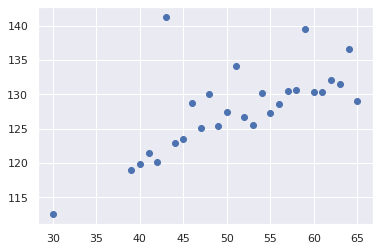

In [22]:
# Grafica la información de la edad y presión alta

age=df['Age']
hiap=df['Average of ap_hi']

plt.scatter(age, hiap);

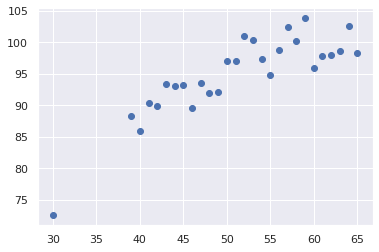

In [23]:
# Grafica la información de la edad y presión alta
loap=df['Average of ap_lo']

plt.scatter(age, loap);

Genera una regresión líneal para obtener una aproximación de la ecuación 
$$ y = ax + b $$
donde $ a $ se conoce comúnmente como **pendiente**, y $ b $ se conoce comúnmente como **intersección**, tanto para presión alta como la presión baja.

In [29]:
# ¿Cuál es el valor de a y cuál es el valor de b para la presión alta?
modelHi = LinearRegression(fit_intercept=True)

modelHi.fit(age[:, np.newaxis], hiap)

print("A high:", modelHi.coef_[0])
print("B high:", modelHi.intercept_)

A high: 0.47769702977669154
B high: 103.3969740964366


<ipython-input-29-13a0b3c49197>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  modelHi.fit(age[:, np.newaxis], hiap)


In [26]:
# ¿Cuál es el valor de a y cuál es el valor de b para la presión baja?
modelLo = LinearRegression(fit_intercept=True)

modelLo.fit(age[:, np.newaxis], loap)

print("A high:", modelLo.coef_[0])
print("B high:", modelLo.intercept_)

A high: 0.6089810580238237
B high: 63.726200409422745


<ipython-input-26-5d74caab4ff0>:4: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  modelLo.fit(age[:, np.newaxis], loap)


Gráfica los datos reales contra los obtenidos con el modelo. Se debe visualizar los datos reales (azúl), recta del modelo (negro)y distancias entre ambos. (verde) 

<ipython-input-34-bade1b9a3f1d>:9: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.plot(np.vstack([age,age]), np.vstack([hiap, modelHi.predict(age[:, np.newaxis])]), color="green");


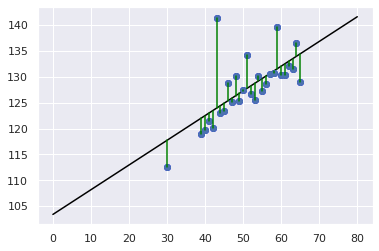

In [34]:
# Presión alta

xfit = np.linspace(0, 80, 1000)
yfit = modelHi.predict(xfit[:, np.newaxis])

plt.scatter(age, hiap, color="blue")
plt.plot(xfit, yfit, color="black");
plt.plot(age, hiap, 'o')
plt.plot(np.vstack([age,age]), np.vstack([hiap, modelHi.predict(age[:, np.newaxis])]), color="green");

<ipython-input-35-6a20150fae01>:8: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  plt.plot(np.vstack([age,age]), np.vstack([loap, modelLo.predict(age[:, np.newaxis])]), color="green");


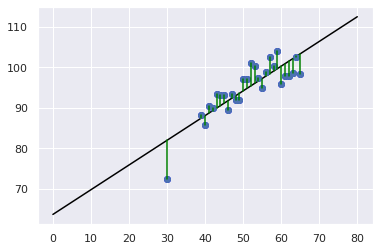

In [35]:
# Presión baja
xfit = np.linspace(0, 80, 1000)
yfit = modelLo.predict(xfit[:, np.newaxis])

plt.scatter(age, loap, color="blue")
plt.plot(xfit, yfit, color="black");
plt.plot(age, loap, 'o')
plt.plot(np.vstack([age,age]), np.vstack([loap, modelLo.predict(age[:, np.newaxis])]), color="green");

¿Cual es la presión arterial atal y baja para una persona de cierta edad? Genera dos funciones que calculen los anterior.

In [41]:
def pressure_low(age):
  return modelLo.predict([[age]])

query_age= 76
pressure_low(query_age)

array([110.00876082])

In [42]:
def pressure_high(age):
  return modelHi.predict([[age]])

query_age= 76
pressure_high(query_age)

array([139.70194836])